
Data Analysis/Data Visualization Report: Bike Ride Trends and Biker Types of Ford GoBike System May,2021 by Tarun Aditya TR


Investigation Overview
In this investigation, I will to look at the bike ride trends and biker type of the bay Area bike share system. The main focus was on biking duration, the time (weekday, hour), and the bike types.

Dataset Overview
This document explores the Ford GoBike's trip data for public containing bike rides from April FY2019. The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age. 16K data points were removed from the analysis due to missing values in some fields, data inconsistent, or outliner issues

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv(r'C:\Users\TARUN\Documents\clean_data.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 19.6+ MB


## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

In [6]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_time'] = df['start_time'].astype(ordered_weekdays)


Bike Ride Duration Time Visualization:¶
The origianl duration data has right skew issue - bike durations range from less than 1 minute to 1400+ minutes with median at around 9 min and mean at around 12 min.
We have to do some data transformation to make data visualization and data interpretation easiler. Below are the plots before/after data transformation.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
duration_sec               183412 non-null int64
start_time                 0 non-null category
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: category(1), float64(6), int64(2), object(5)
memory usage: 18.4+ MB


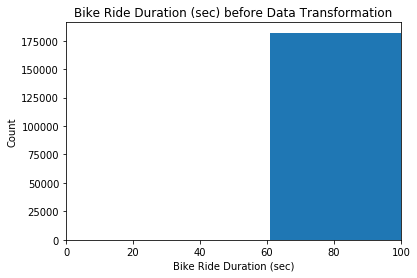

In [8]:
plt.hist(data = df, x = 'duration_sec', bins = 20);
plt.xlim(0, 100);
plt.xlabel("Bike Ride Duration (sec)");
plt.ylabel("Count");
plt.title("Bike Ride Duration (sec) before Data Transformation");

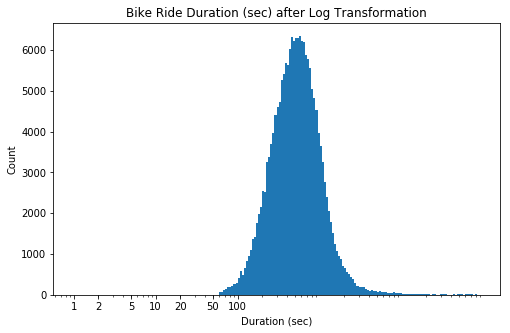

In [9]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel('Duration (sec)');
plt.ylabel('Count');
plt.title("Bike Ride Duration (sec) after Log Transformation");

# Daily/Weekly Bike Ride Trends and Biker Type Visualization:
Features investigated include the following: Start Time Hour, Start Time DayofWeek, Member Gender, and User Type.
Observations from below plots:
Tuesday, 5:00 PM has the highest biker counts across 7 days, 24 hours.
5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
5:00 PM has the most 'Subscriber' bikers compared to other hours. It also has the most 'Customer' bikers compared to other hours.
Tuesday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
Tuesday has the most 'Subscriber' bikers compared to other days. Saturday has the most 'Customer' bikers compared to other days.
Most 'Subscriber' are male. Most 'Customer' bikers are also male.

In [ ]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [15, 10]);

plt.subplot(3, 1, 1);
sb.countplot(data = df, x = 'duration_sec', hue = 'start_station_name', palette = 'Blues');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df, x = 'duration_sec', hue = 'bike_id', palette = 'Blues');
ax.legend(ncol = 2); # re-arrange legend to reduce overlapping


ax = plt.subplot(3, 1, 3);
sb.countplot(data = df, x = 'duration_sec', hue = 'user_type', palette = 'Greens');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!